# Sentiment Analysis on mobile phone reviews

The given task is to learn sentiment from all the given reviews and predict rating from a new review. This objective is attained by following the steps listed below:

### Importing the modules

In [69]:
import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 

In [70]:
from nltk.stem import SnowballStemmer


### Data Labeling

- In this step we clean the data and label the data as <br>
  > 0 for Poor <br>
  > 1 for Neutral <br>
  > 2 for Good
- Read the data from __'Amazon_Unlocked_Mobile.csv'__ and add new column for labels

In [71]:
def label_data():
    rows = pd.read_csv('Amazon_Unlocked_Mobile.csv', header=0, index_col=False, delimiter=',')
    labels = []
    for cell in rows['Rating']:
        if cell >= 4:
            labels.append('2')   #Good
        elif cell == 3:
            labels.append('1')   #Neutral
        else:
            labels.append('0')   #Poor
            
    rows['Label'] = labels
    del rows['Review Votes']
    return rows

### Data Cleaning

Remove all the rows containing blank cells. The resultant data is stored as __'labelled_dataset.csv'__

In [72]:
def clean_data(data):
    #columnwise print number of rows containing blank values
    #print data.isnull().sum()
    
    #replace blank values in all the cells with 'nan'
    data.replace('',np.nan,inplace=True)
    #delete all the rows which contain at least one cell with nan value
    data.dropna(axis=0, how='any', inplace=True)
    
    #Check the number of rows containing blank values. This should be zero now as compared to first line of this function
    #print data.isnull().sum()
    #save output csv file
    data.to_csv('labelled_dataset.csv', index=False)
    return data

### Data preprocessing

The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.

- remove html tags using BeautifulSoup
- remove non-character such as digits and symbols
- convert to lower case
- remove stop words such as "the" and "and" if needed
- convert to root words by stemming if needed

In [73]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
        # stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [74]:
def modelEvaluation(predictions, y_test_set):
    #Print model evaluation to predicted result 
    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    #print "\nAUC score : {:.4f}".format(roc_auc_score(y_test_set, predictions))
    print ("\nClassification report : \n", metrics.classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_set, predictions))

### Bag of Words

The sentiment analysis of given text can be done in two ways. First, we need to find a word embedding to convert a text into a numerical representation. Second, we fit the numerical representations of text to machine learning algorithms or deep learning architectures.

One common approach of word embedding is frequency based embedding such as Bag of Words (BoW) model. BoW model learns a vocubulary list from a given corpus and represents each document based on some counting methods of words. In this part, we will explore the model performance of using BoW with supervised learning algorithms. Here's the workflow in this part.

- Step 1 : Preprocess raw reviews to cleaned reviews
- Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn
- Step 3 : Transform review text to numerical representations (feature vectors)
- Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)
- Step 5 : Improve the model performance by GridSearch

In [75]:
if __name__ == '__main__':
    # df = pd.read_csv('./data.csv')
    # print(df)
    data = label_data()
    data = clean_data(data)
    # prints first 5 rows of the dataset
    print(data.head())    

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews Label  
0       5  I feel so LUCKY to have found this used (phone...     2  
1       4  nice phone, nice up grade from my pantach revu...     2  
2       5                                       Very pleased     2  
3       4  It works good but it goes slow sometimes but i...     2  
4       4  Great phone to replace my lost phone. The only...     2  


### Visualisation

Text(0, 0.5, 'Count')

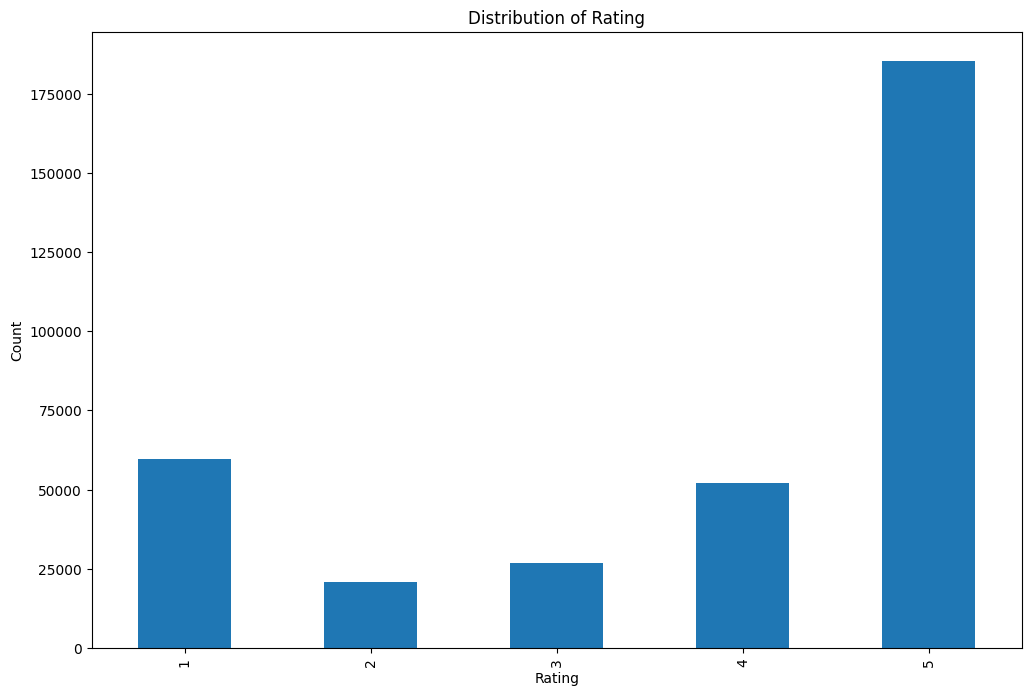

In [76]:
# Plot distribution of rating
plt.figure(figsize=(12,8))
# sns.countplot(data['Rating'])
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

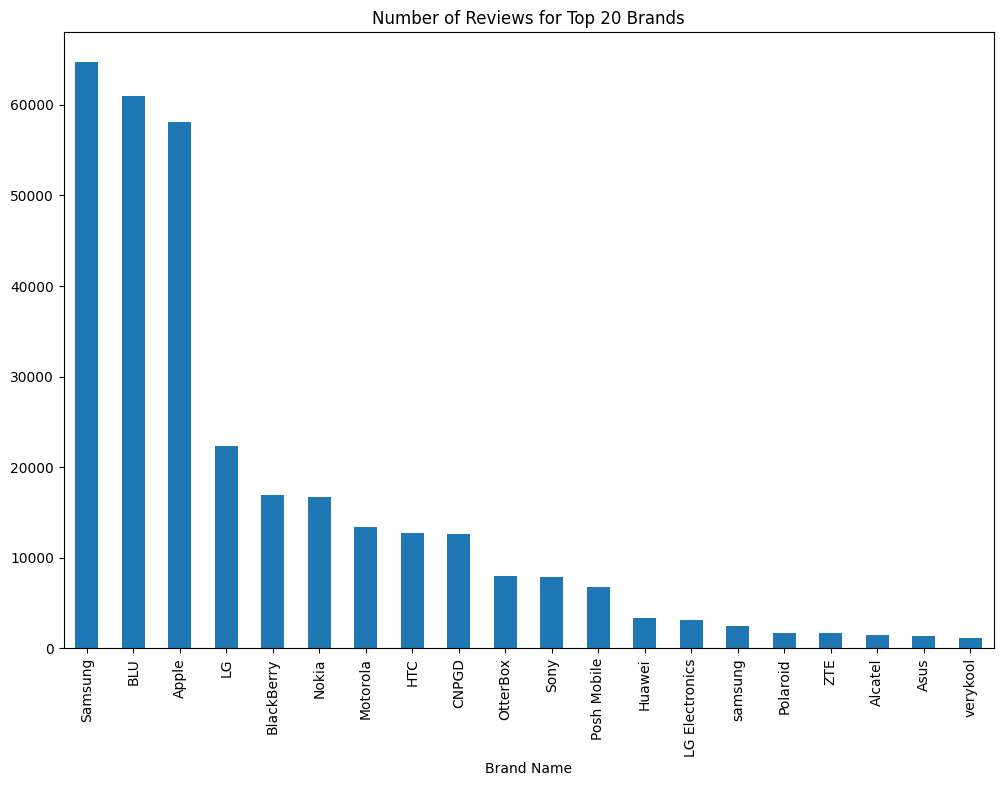

In [77]:
# Plot number of reviews for top 20 brands
brands = data["Brand Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")

Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

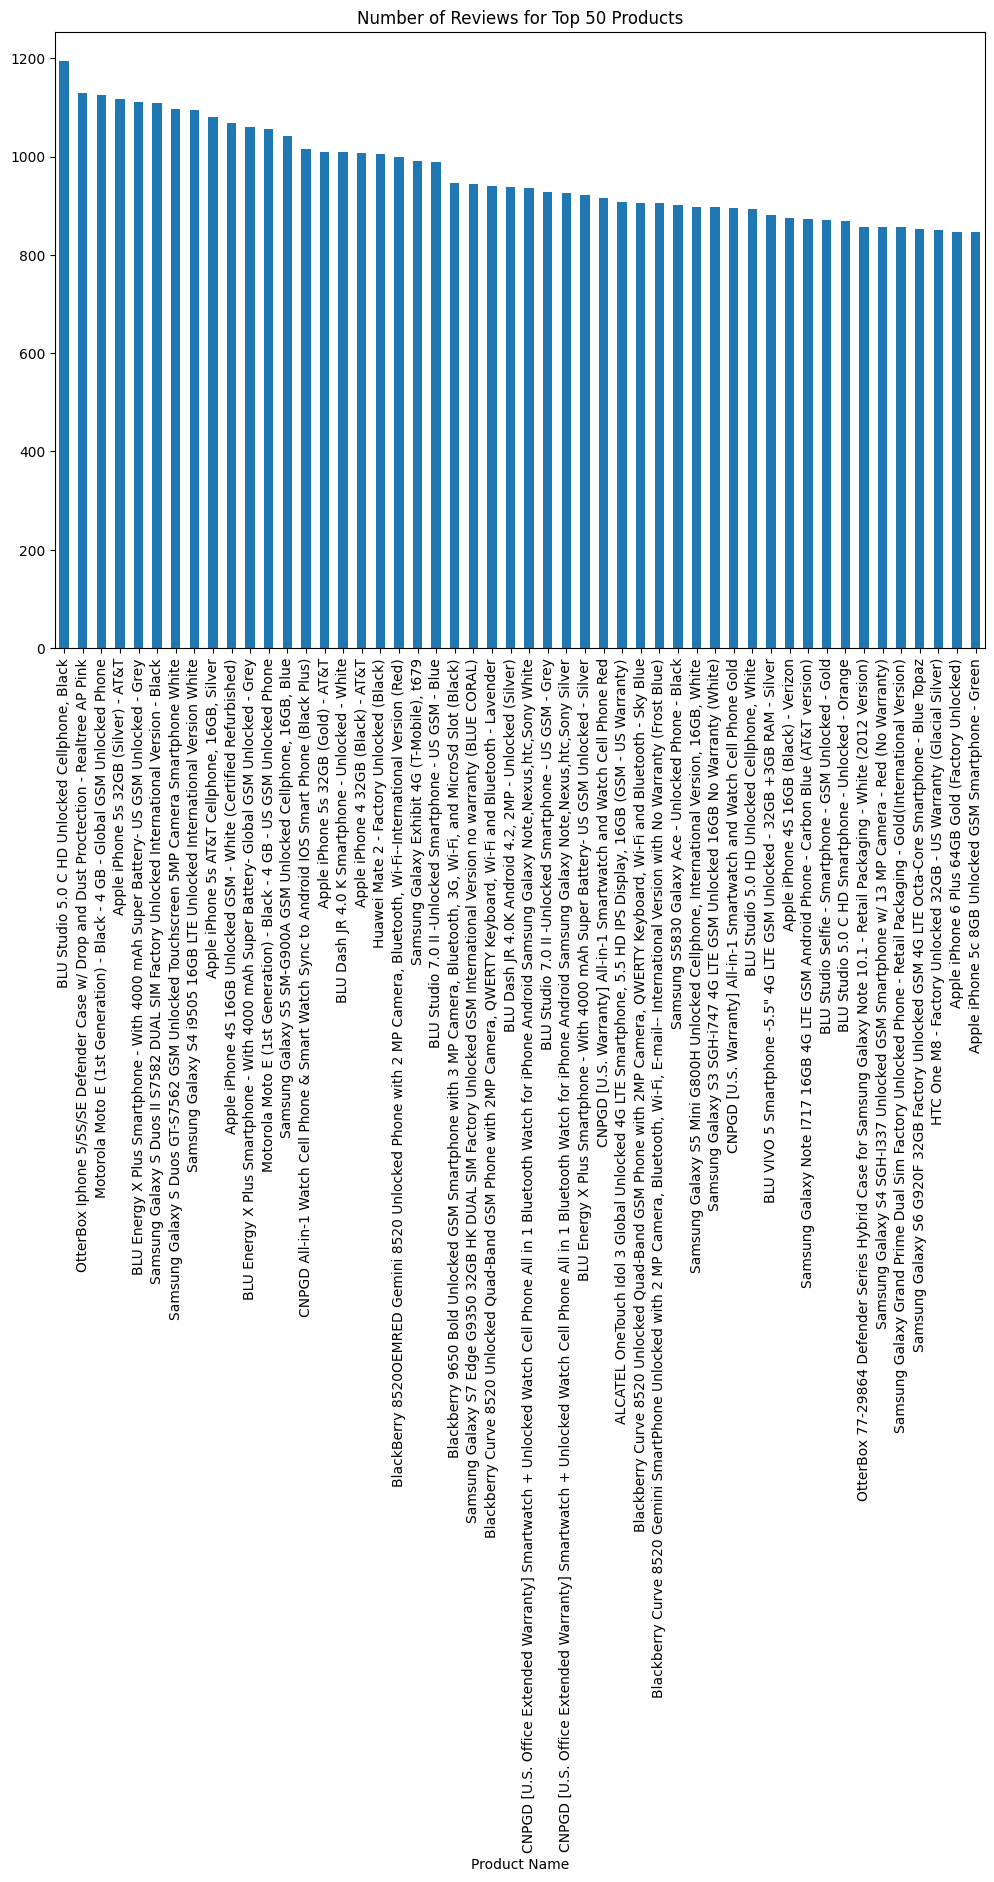

In [78]:
# Plot number of reviews for top 50 products
products = data["Product Name"].value_counts()
plt.figure(figsize=(12,8))
products[:50].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")

Text(0, 0.5, 'Count')

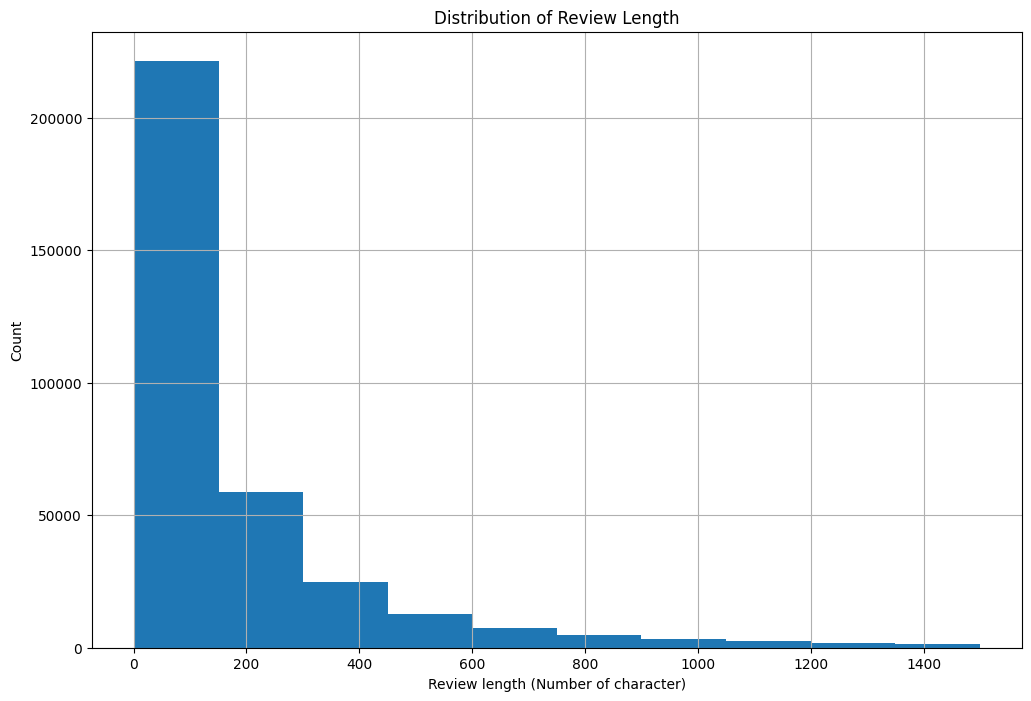

In [79]:
# Plot distribution of review length
review_length = data["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [80]:
#split data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(data['Reviews'], data['Label'], test_size=0.1, random_state=0)


#If the label are words instead of numbers, they can be replaced programmatically using following two lines
#y_train = label_binarize(y_train, classes=[0, 1, 2])
#y_test = label_binarize(y_test, classes=[0, 1, 2])

In [81]:
print(x_train.shape)
print(y_train.shape)

(310050,)
(310050,)


In [86]:
x_train.info()

<class 'pandas.core.series.Series'>
Index: 310050 entries, 264827 to 360134
Series name: Reviews
Non-Null Count   Dtype 
--------------   ----- 
310050 non-null  object
dtypes: object(1)
memory usage: 4.7+ MB


In [87]:
# Preprocess text data in training set and validation set
x_train_cleaned = x_train
x_test_cleaned = x_test

# for d in x_train:
#     x_train_cleaned.append(cleanText(d))

# for d in x_test:
#     x_test_cleaned.append(cleanText(d))    

### CountVectorizer with Mulinomial Naive Bayes (Benchmark Model)

Now we have cleaned reviews, the next step is to convert the reviews into numerical representations for machine learning algorithm.

In sklearn library, we can use CountVectorizer which implements both tokenization and occurrence counting in a single class. The output is a sparse matrix representation of a document.

In [90]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
x_train_countVect = countVect.fit_transform(x_train_cleaned)
print ("Number of features : %d \n" %len(countVect.get_feature_names_out())) #6378 
print ("Show some feature names : \n", countVect.get_feature_names_out()[::1000])

Number of features : 60914 

Show some feature names : 
 ['00' '2009' '3gs' '74mb' 'accepted' 'agradesco' 'annually' 'asterisks'
 'balance' 'billthe' 'brightnes' 'cameraoverall' 'chargest' 'collapses'
 'congratulationsexcellent' 'craftsmanship' 'deactivatable' 'destktop'
 'disposal' 'e2uie4u2' 'enlihhten' 'exasperating' 'fancier' 'flounder'
 'futures' 'goodcamera' 'hairband' 'hnoe' 'imediatly' 'insteadomg' 'iwer'
 'krish' 'likd' 'mades' 'menuundocumented' 'moneyi' 'nb' 'novia'
 'operateworth' 'pals' 'philosophical' 'poised' 'probar' 'purshare'
 'reason' 'relay' 'reversal' 'sammie' 'sencondone' 'simmobile'
 'softwarehtc' 'stages' 'sumanmente' 'tdd' 'thk' 'trano' 'uncompatible'
 'usd179' 'vive' 'wheat' 'wrwite']


In [91]:
# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(x_train_countVect, y_train)

MultinomialNB()

In [92]:
# Evaluate the model on validaton set
predictions = mnb.predict(countVect.transform(x_test_cleaned))
modelEvaluation(predictions, y_test)


Accuracy on validation set: 0.8576

Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      8129
           1       0.44      0.25      0.32      2649
           2       0.90      0.94      0.92     23673

    accuracy                           0.86     34451
   macro avg       0.71      0.67      0.68     34451
weighted avg       0.84      0.86      0.85     34451


Confusion Matrix : 
 [[ 6539   391  1199]
 [  791   656  1202]
 [  886   436 22351]]


### TfidfVectorizer with Logistic Regression

Some words might frequently appear but have little meaningful information about the sentiment of a particular review. Instead of using occurance counting, we can use tf-idf transform to scale down the impact of frequently appeared words in a given corpus.

In sklearn library, we can use TfidfVectorizer which implements both tokenization and tf-idf weighted counting in a single class.

In [94]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
x_train_tfidf = tfidf.fit_transform(x_train)
print( "Number of features : %d \n" %len(tfidf.get_feature_names_out())) #1722
print ("Show some feature names : \n", tfidf.get_feature_names_out()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)

Number of features : 21144 

Show some feature names : 
 ['00' '9300' 'applies' 'blocked' 'chosen' 'craigslist' 'disapointmenht'
 'eraser' 'flung' 'guys' 'infinitely' 'leave' 'middling' 'ocurre'
 'pioneer' 'quicky' 'rex' 'signed' 'stunk' 'tn' 'vantage' 'yhe']


/Users/rahulsingh/Developer/python/sentiment_analysis/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
# Look at the top 10 features with smallest and the largest coefficients
feature_names = np.array(tfidf.get_feature_names_out())
sorted_coef_index = lr.coef_[0].argsort()
print ("Total number of features = " + str(len(sorted_coef_index)))
print ('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print ('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Total number of features = 21144

Top 10 features with smallest coefficients :
['great' 'love' 'amazing' 'perfectly' 'excellent' 'awesome' 'loves'
 'perfect' 'far' 'excelent']

Top 10 features with largest coefficients : 
['worst' 'junk' 'useless' 'not' 'waste' 'unusable' 'garbage' 'worthless'
 'awful' 'terrible']


In [97]:
# Evaluate on the validaton set
predictions = lr.predict(tfidf.transform(x_test_cleaned))
modelEvaluation(predictions, y_test)


Accuracy on validation set: 0.8865

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      8129
           1       0.58      0.22      0.32      2649
           2       0.92      0.97      0.94     23673

    accuracy                           0.89     34451
   macro avg       0.78      0.69      0.70     34451
weighted avg       0.87      0.89      0.87     34451


Confusion Matrix : 
 [[ 7115   193   821]
 [  848   580  1221]
 [  597   230 22846]]


### SVM and Trees

system will use two algorithms SVM and Random Forest to perform analysis and to determine which suits better for recommendation.

### Support Vector Machine

Here we implement multi-svm for sentiment analysis. More information about it can be found on [this](http://scikit-learn.org/stable/modules/svm.html) link. <br>

- Tip 1 : Here, different kernels can be tried out. For example, linear, nonlinear, precomputed, rbf etc.
- Tip 2 : The parameter values given below can be tweaked to obtain different results.

### Using LinearSVC

Here you can tweak the api parameters of LinearSVC as per your choice. Refer to [this](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) link for making any changes.

In [98]:
#x_train_subset = tfidf.transform(x_train_cleaned[:100])
x_train_input = tfidf.transform(x_train_cleaned)
svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(x_train_input, y_train)
y_svr_lin_predicted = svr_lin.predict(tfidf.transform(x_test_cleaned))

In [99]:
modelEvaluation(y_svr_lin_predicted, y_test)


Accuracy on validation set: 0.8948

Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      8129
           1       0.71      0.24      0.36      2649
           2       0.92      0.97      0.94     23673

    accuracy                           0.89     34451
   macro avg       0.82      0.70      0.72     34451
weighted avg       0.89      0.89      0.88     34451


Confusion Matrix : 
 [[ 7243   109   777]
 [  833   632  1184]
 [  572   148 22953]]


### Functions for Model Evaluation

There are multiple functions for model evaluation in scikit learn. To know more about them, please follow the below mentioned links
- [accuracy score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
- [f_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)
- [f1_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
- [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [100]:
print ("Accuracy of this SVM = " + str(metrics.accuracy_score(y_test, y_svr_lin_predicted)))
print ("Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_svr_lin_predicted, pos_label=2, average='weighted')))
print ("F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_svr_lin_predicted, pos_label=2, average='weighted')))
print ("confusion matrix = " + str(metrics.confusion_matrix(y_test, y_svr_lin_predicted)))

Accuracy of this SVM = 0.8948361440887057
Fscore of this SVM = (np.float64(0.8853502991144407), np.float64(0.8948361440887057), np.float64(0.8804408403906743), None)


/Users/rahulsingh/Developer/python/sentiment_analysis/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/rahulsingh/Developer/python/sentiment_analysis/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


F-1 score of this SVM = 0.8804408403906743
confusion matrix = [[ 7243   109   777]
 [  833   632  1184]
 [  572   148 22953]]


### Random Forest

Refer to [this](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#id1) link for more information

In [101]:
rand = RandomForestClassifier()
rand.fit(x_train_input, y_train)
y_rand_predicted = rand.predict(tfidf.transform(x_test_cleaned))

In [102]:
modelEvaluation(y_rand_predicted, y_test)


Accuracy on validation set: 0.9499

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      8129
           1       0.98      0.65      0.78      2649
           2       0.95      0.99      0.97     23673

    accuracy                           0.95     34451
   macro avg       0.96      0.86      0.90     34451
weighted avg       0.95      0.95      0.95     34451


Confusion Matrix : 
 [[ 7543    13   573]
 [  234  1728   687]
 [  193    25 23455]]


In [103]:
print ("Accuracy of Random Forest = " + str(rand.score(tfidf.transform(x_test_cleaned), y_test)))
print ("Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_rand_predicted, pos_label=2, average='weighted')))
print ("F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_rand_predicted, pos_label=2, average='weighted')))
print ("confusion matrix = " + str(metrics.confusion_matrix(y_test, y_rand_predicted)))

Accuracy of Random Forest = 0.9499288845026269
Fscore of this SVM = (np.float64(0.9506720799300561), np.float64(0.9499288845026269), np.float64(0.9474619439248724), None)


/Users/rahulsingh/Developer/python/sentiment_analysis/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/rahulsingh/Developer/python/sentiment_analysis/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


F-1 score of this SVM = 0.9474619439248724
confusion matrix = [[ 7543    13   573]
 [  234  1728   687]
 [  193    25 23455]]


### Decision Tree

Refer [this](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) link for more information

In [104]:
decTree = DecisionTreeClassifier()
decTree.fit(x_train_input, y_train)
y_decTree_predicted = decTree.predict(tfidf.transform(x_test_cleaned))

In [105]:
modelEvaluation(y_decTree_predicted, y_test)


Accuracy on validation set: 0.9268

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      8129
           1       0.77      0.70      0.73      2649
           2       0.95      0.96      0.96     23673

    accuracy                           0.93     34451
   macro avg       0.87      0.85      0.86     34451
weighted avg       0.93      0.93      0.93     34451


Confusion Matrix : 
 [[ 7275   245   609]
 [  280  1844   525]
 [  544   318 22811]]


In [106]:
print ("Accuracy of Decision Tree = " + str(decTree.score(tfidf.transform(x_test_cleaned), y_test)))
print ("Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_decTree_predicted, pos_label=2, average='weighted')))
print ("F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_decTree_predicted, pos_label=2, average='weighted')))
print ("confusion matrix = " + str(metrics.confusion_matrix(y_test, y_decTree_predicted)))

Accuracy of Decision Tree = 0.9268236045397812
Fscore of this SVM = (np.float64(0.9254658854611446), np.float64(0.9268236045397812), np.float64(0.9259937521245089), None)


/Users/rahulsingh/Developer/python/sentiment_analysis/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/rahulsingh/Developer/python/sentiment_analysis/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


F-1 score of this SVM = 0.9259937521245089
confusion matrix = [[ 7275   245   609]
 [  280  1844   525]
 [  544   318 22811]]
